#### Alexei Alves de Souza - 398611
#### No projeto anterior, não possuiamos uma abstração para os valores de saídas para divisão em classes específicas.
#### Já no projeto 5.9 possuímos uma padronização, no caso para os tipos de conservantes, o que permite que usemos redes mais robustas já bastante otimizadas.
#### No caso será utilizado nessa análise a rede MLP fornecida pela lib sklearn.

#### Inicialmente será carregado o dataset utilizando a  lib pandas

In [1]:
import pandas as pd
import numpy as np
import time # Lib utilizada para medir o tempo de execução

In [2]:
dataset = pd.read_excel('Tabela#5.5_RNA.xls')
dataset.head(5)

,x1,x2,x3,x4,d1,d2,d3
0,0.8622,0.7101,0.6236,0.7894,0,0,1
1,0.2741,0.1552,0.1333,0.1516,1,0,0
2,0.6772,0.8516,0.6543,0.7573,0,0,1
3,0.2178,0.5039,0.6415,0.5039,0,1,0
4,0.7260,0.7500,0.7007,0.4953,0,0,1


In [3]:
data = np.array(dataset)
inputs = data[:,0:4]
labels = data[:,4:7]

#### Observamos que não é fornecido um dataset de treinamento, assim dividiremos o dataset fornecido na tabela 5.5 em train e test

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
(train,test,ltrain,ltest) = train_test_split(inputs,labels,test_size = 0.2)

#### 1) ---> classificador MLP utilizando a lib sklearn

In [6]:
from sklearn.neural_network import MLPClassifier

##### tol = 1e-6, representa 10^-6
##### learning_rate_init=0.01, inicialização da taxa de aprendizagem
##### activation = 'logistic' , representa a funcao de ativacao sigmoide
##### hidden_layer_sizes=15, numero de neuroinios na camada escondida
##### max_iter = 10000, define o numero maximo de iteracoes
##### momentum = 0.0, note que como o algoritimo do sklearn já é otimizado ele usa por default valores adequados do momentum, assim setamos o valor em 0 para simular uma situação real
##### solver = 'sgd', Utilizamos a descida do gradiente estocástico

In [7]:
MLP = MLPClassifier(hidden_layer_sizes=15,activation = 'logistic', tol=1e-6,learning_rate_init=0.1,
                    max_iter=100000,momentum=0.0, solver='sgd')

In [8]:
start_time1 = time.time() 
#------------------------
MLP.fit(train,ltrain)
#-------------------------
end_time1 = time.time()

t_exec1 = end_time1 - start_time1


In [9]:
print('N de iteracoes p/ convergencia:\n',MLP.n_iter_,' iteracoes')

N de iteracoes p/ convergencia:
 17560  iteracoes


#### 2)---> MLP com momentun de 0,9

##### momentum = 0.9, setamos o valor do momentum na inicialização para 0.9

In [10]:
MLP_2 = MLPClassifier(hidden_layer_sizes=15,activation = 'logistic',tol=1e-6,learning_rate_init=0.1,
                      max_iter=10000,momentum = 0.9,solver='sgd')

In [11]:
start_time2 = time.time() 
#------------------------
MLP_2.fit(train,ltrain)
#-------------------------
end_time2 = time.time()

t_exec2 = end_time2 - start_time2

In [12]:
print('N de iteracoes p/ convergencia:\n',MLP_2.n_iter_,' iteracoes')

N de iteracoes p/ convergencia:
 3938  iteracoes


#### 3)---> Plot dos gráficos

In [13]:
import matplotlib.pyplot as plt

#### Plot T1

In [14]:
niter = np.arange(MLP.n_iter_)
loss = MLP.loss_curve_

Tempo de execucao: 5.143 segundos


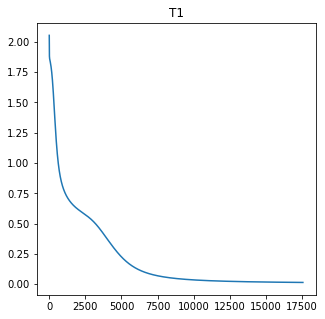

In [26]:
plt.figure(figsize = (5,5))
plt.plot(niter,loss)
plt.title('T1')
print('Tempo de execucao:', np.round(t_exec1,3),'segundos')

#### Plot T2

In [16]:
niter2 = np.arange(MLP_2.n_iter_)
loss2 = MLP_2.loss_curve_

Tempo de execucao: 1.128 segundos


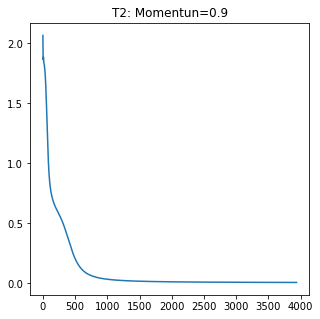

In [29]:
plt.figure(figsize = (5,5))
plt.plot(niter2,loss2)
plt.title('T2: Momentun=0.9')
print('Tempo de execucao:', np.round(t_exec2,3), 'segundos')

#### Observamos que com a inserção do momentun adequado, temos uma convergência bem mais rápida da rede

#### 4)----> No Modelo do sklearn para o MLP o método predict já realiza a ativação das funções de acordo com as respectivas classes, ainda que a função predict_proba retorne a probabilidade das saídas a qual pode ser utilizada para o requerido na questão.
#### Assim, utilizamos os valores obtidos pelo método predict_proba na função de ativação.

#### Nesse codigo é recebido um vetor ou array de entradas, sendo este redimensionando para uma lista para análise elemento por elemento e classificação, e no final redimensional para a dimensão original.

In [18]:
def myPredict(inputs):
    outputs = []
    #Obtem as dimensoes
    x= inputs.shape[0]
    y= inputs.shape[1]
    
    #Redimensiona para analise elemento por elemento
    new_inputs = inputs.copy().reshape((x*y,))
    for i in range(len(new_inputs)):
        if new_inputs[i] >= 0.5:
            new_inputs[i] = 1
        else :
            new_inputs[i] = 0
    
    #Redimensiona o vetor para as dimensoes originais
    new_inputs = new_inputs.reshape((x,y))
    return new_inputs
        
    

In [19]:
inputs_= MLP_2.predict_proba(train)
print('Mypredict')
print(myPredict(inputs_))
print('----------------------')
print('Real labels')
print(ltrain)

Mypredict
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
----------------------
Real labels
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


#### 5)--> Validando a rede no dataset de teste criado anteriormente temos, utilizando a função score já implementada no sklearn:

In [30]:
print('Precisao:\n',MLP_2.score(test,ltest)*100,'%')

Precisao:
 100.0 %


In [31]:
print('Precisao:\n',MLP.score(test,ltest)*100,'%')

Precisao:
 100.0 %


#### Logo temos uma taxa de acerto de 100%, porém dependendo dos dados utiizados como treinamento  essa taxa poderá ser menor dado a situação em que a quantidade de dados é relativamente baixa, assim uma validação interessante seria aplicar o método da validação cruzada para determinar os dados que 'representam' o conjunto.

In [22]:
from prettytable import PrettyTable

In [23]:
Mytable = PrettyTable(["x1 x2 x3","yreal","ypredito"])
ypredito = myPredict(MLP.predict_proba(test))

In [24]:
for i in range(len(test)):
    Mytable.add_row([test[i],ltest[i],ypredito[i]])

In [25]:
print(Mytable)

+-------------------------------+------------+------------+
|            x1 x2 x3           |   yreal    |  ypredito  |
+-------------------------------+------------+------------+
| [0.1187 0.2568 0.314  0.3037] | [1. 0. 0.] | [1. 0. 0.] |
| [0.726  0.75   0.7007 0.4953] | [0. 0. 1.] | [0. 0. 1.] |
| [0.7325 0.4761 0.3888 0.5683] | [0. 1. 0.] | [0. 1. 0.] |
| [0.5682 0.5683 0.5054 0.4426] | [0. 1. 0.] | [0. 1. 0.] |
+-------------------------------+------------+------------+
